<a href="https://colab.research.google.com/github/vijay9119y/Internsavy_Projects/blob/main/PredictionOfGraduateAdmissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing required libraries**

In [2]:
# Loading libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pt

# ML libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import time
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load dataset
admit=pd.read_csv("Admission_Predict_Ver1.1.csv")


In [4]:
# Shape of dataset
admit.shape

(500, 9)

In [5]:
# head of dataframe
admit.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
# Tail of dataframe
admit.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [7]:
#information about dataframe
admit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
admit.columns=admit.columns.str.replace(" ","")
admit.columns

Index(['SerialNo.', 'GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR',
       'CGPA', 'Research', 'ChanceofAdmit'],
      dtype='object')

In [9]:
# choosing int columns
int_col=admit.select_dtypes(include=["int64"]).columns.tolist()
int_col

['SerialNo.', 'GREScore', 'TOEFLScore', 'UniversityRating', 'Research']

In [10]:
# choosing float columns
float_col=admit.select_dtypes(include=["float64"]).columns.tolist()
float_col

['SOP', 'LOR', 'CGPA', 'ChanceofAdmit']

In [11]:
# unique datatypes
admit.dtypes.value_counts()

int64      5
float64    4
dtype: int64

In [12]:
#Unique values in dataframe
admit.nunique().sort_values(ascending=False)

SerialNo.           500
CGPA                184
ChanceofAdmit        61
GREScore             49
TOEFLScore           29
SOP                   9
LOR                   9
UniversityRating      5
Research              2
dtype: int64

In [13]:
# we don't have null values identified in info().Lets look again..
admit.isnull().sum()

SerialNo.           0
GREScore            0
TOEFLScore          0
UniversityRating    0
SOP                 0
LOR                 0
CGPA                0
Research            0
ChanceofAdmit       0
dtype: int64

In [14]:
# Descriptive Statistics
admit.describe()

,SerialNo.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [15]:
#Removing unwanted columns
new_admit=admit.drop("SerialNo.",axis=1)
new_admit

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


Text(0, 0.5, 'Count')

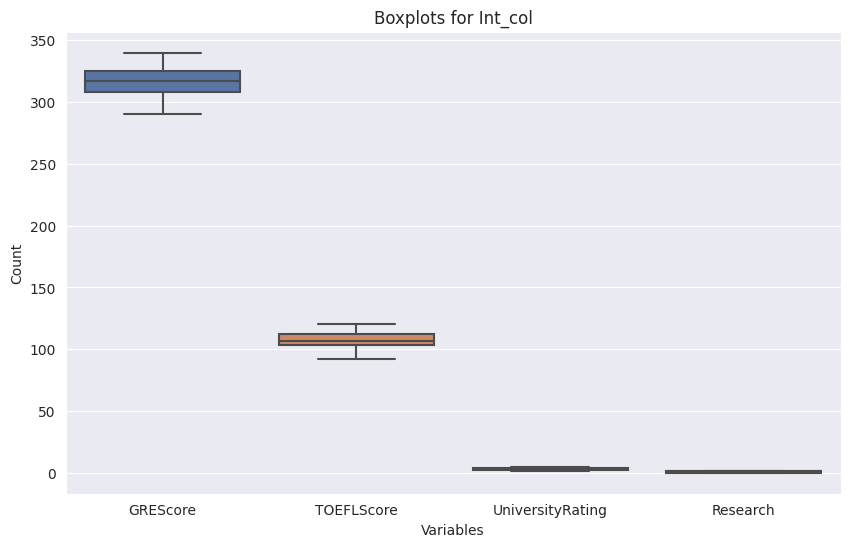

In [16]:
# lets check for outliers in int_col
sb.set({"figure.figsize":(10,6)})
pt.title("Boxplots for Int_col")
sb.boxplot(new_admit[['GREScore', 'TOEFLScore', 'UniversityRating', 'Research']])
pt.xlabel("Variables")
pt.ylabel("Count")

Text(0, 0.5, 'Count')

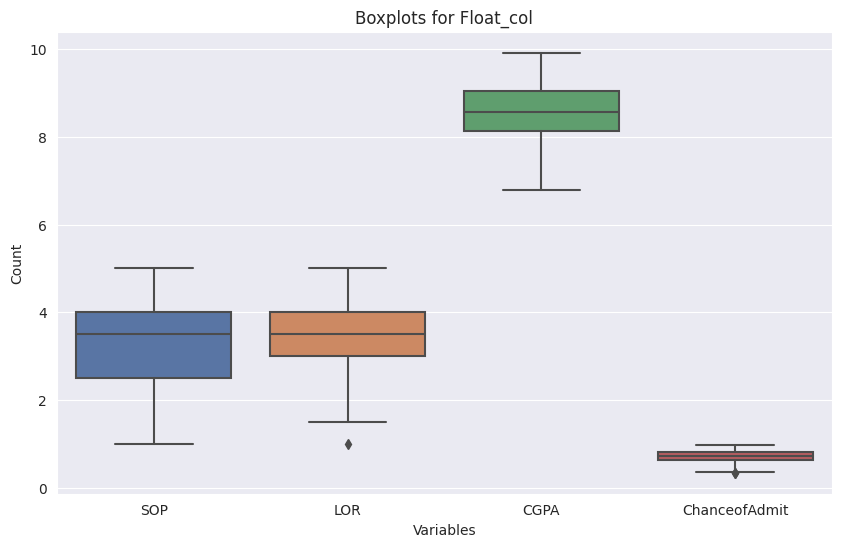

In [17]:
# lets check for outliers in float_col
sb.set({"figure.figsize":(10,6)})
pt.title("Boxplots for Float_col")
sb.boxplot(new_admit[['SOP', 'LOR', 'CGPA', 'ChanceofAdmit']])
pt.xlabel("Variables")
pt.ylabel("Count")

Text(0, 0.5, 'Count')

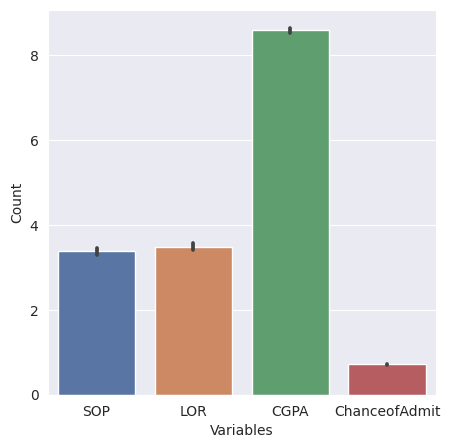

In [18]:
#plotting unique values
sb.set({"figure.figsize":(5,5)})
sb.barplot(new_admit[['SOP', 'LOR', 'CGPA', 'ChanceofAdmit']])
pt.xlabel("Variables")
pt.ylabel("Count")

In [19]:
# Lets change the values in the Admit column to binary. Where 0 indicates "Not Admitted", 1 indicates "Admitted".
new_admit["ChanceofAdmit"]=np.where(new_admit["ChanceofAdmit"]>0.5,1,0)
new_admit["ChanceofAdmit"].head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    0
9    0
Name: ChanceofAdmit, dtype: int64

In [20]:
#lets check the dataframe by adding original values

dummy=new_admit.assign(Original_admit=admit["ChanceofAdmit"])
dummy.head(10)

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit,Original_admit
0,337,118,4,4.5,4.5,9.65,1,1,0.92
1,324,107,4,4.0,4.5,8.87,1,1,0.76
2,316,104,3,3.0,3.5,8.00,1,1,0.72
3,322,110,3,3.5,2.5,8.67,1,1,0.80
4,314,103,2,2.0,3.0,8.21,0,1,0.65
5,330,115,5,4.5,3.0,9.34,1,1,0.90
6,321,109,3,3.0,4.0,8.20,1,1,0.75
7,308,101,2,3.0,4.0,7.90,0,1,0.68
8,302,102,1,2.0,1.5,8.00,0,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0,0.45


In [21]:
# Lets make response and prediction sets
x=new_admit.drop("ChanceofAdmit",axis=1)
y=new_admit["ChanceofAdmit"]
x.head(3)

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1


In [22]:
y.head(3)

0    1
1    1
2    1
Name: ChanceofAdmit, dtype: int64

In [23]:
# Lets have training and testing data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=49)
xtrain.head(5)

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research
184,316,106,2,2.5,4.0,8.32,0
340,312,107,3,3.0,3.0,8.46,1
21,325,114,4,3.0,2.0,8.40,0
207,310,102,3,3.5,4.0,8.02,1
489,302,110,3,4.0,4.5,8.50,0


In [24]:
xtest.head(5)

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research
339,324,107,5,3.5,4.0,8.66,1
371,324,110,3,3.5,3.0,9.22,1
455,305,102,2,1.5,2.5,7.64,0
239,299,100,1,1.5,2.0,7.89,0
85,319,103,4,4.5,3.5,8.66,0


In [25]:
ytrain.head(5)

184    1
340    1
21     1
207    1
489    1
Name: ChanceofAdmit, dtype: int64

In [26]:
ytest.head(5)

339    1
371    1
455    1
239    1
85     1
Name: ChanceofAdmit, dtype: int64

In [28]:
#preprocessing numeric data using standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain_scale=scaler.fit_transform(xtrain)
xtest_scale=scaler.transform(xtest)

#**Model Building & Evaluation**#

In [29]:
# KNN Algo..
knn=KNeighborsClassifier(n_neighbors=5)

start_knn=time.time()
knn.fit(xtrain_scale,ytrain)
end_knn=time.time()

ytest_pred=knn.predict(xtest_scale)
acc_knn=accuracy_score(ytest,ytest_pred)*100

train_score_knn=knn.score(xtrain_scale,ytrain)*100

print(knn)
print("Train Accuracy :{:.5f} ".format(train_score_knn))
print("Test Accuracy :{:.5f}".format(acc_knn))
print("Training Time : {:.2f} seconds.".format(end_knn-start_knn))

KNeighborsClassifier()
Train Accuracy :95.14286 
Test Accuracy :92.00000
Training Time : 0.01 seconds.


In [30]:
# DT Algo..
dt=DecisionTreeClassifier()

start_dt=time.time()
dt.fit(xtrain_scale,ytrain)
end_dt=time.time()

ytest_pred1=dt.predict(xtest_scale)
acc_dt=accuracy_score(ytest,ytest_pred1)*100

train_score_dt=dt.score(xtrain_scale,ytrain)*100


print(dt)
print("Train Accuracy :{:.5f}".format(train_score_dt))
print("Test Accuracy :{:.5f}".format(acc_dt))
print("Training Time : {:.2f} seconds.".format(end_dt-start_dt))

DecisionTreeClassifier()
Train Accuracy :100.00000
Test Accuracy :92.00000
Training Time : 0.00 seconds.
